In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import mode
import os

# Cria o diretório para salvar as imagens, se não existir
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Ambiente configurado e pronto.")

Ambiente configurado e pronto.



--- Etapa 1: Exploração dos Dados ---

Cabeçalho:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Estatísticas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Gerando Pairplot...


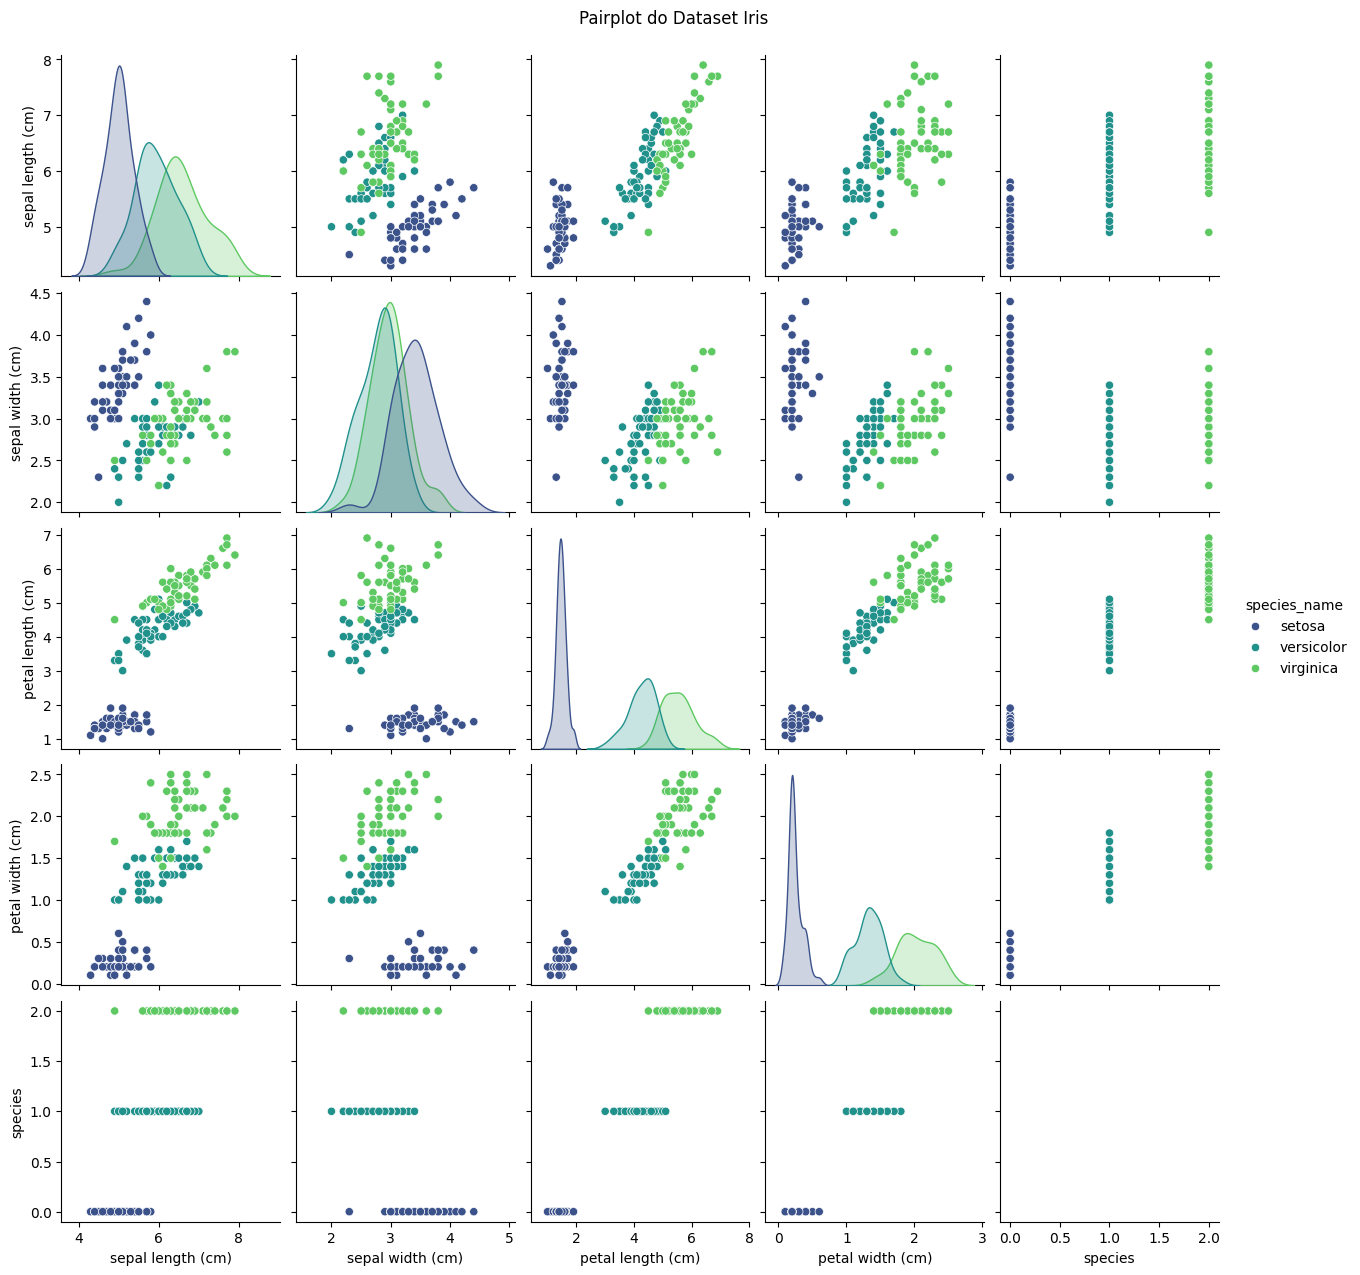

In [2]:
print("\n--- Etapa 1: Exploração dos Dados ---")
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nCabeçalho:")
display(df.head())
print("\nInfo:")
df.info()
print("\nEstatísticas:")
display(df.describe())

print("\nGerando Pairplot...")
sns.pairplot(df, hue='species_name', palette='viridis')
plt.suptitle('Pairplot do Dataset Iris', y=1.02)
plt.savefig(f'{output_dir}/1_pairplot_exploracao.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
print("\n--- Etapa 2: Aplicação das Técnicas ---")
# Pré-processamento
X = df.drop(['species', 'species_name'], axis=1)
y = df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print("Dados divididos e normalizados.")

# Treinamento do KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Modelo KNN treinado.")

# Treinamento do K-Means
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_train)
print("Modelo K-Means treinado.")


--- Etapa 2: Aplicação das Técnicas ---
Dados divididos e normalizados.
Modelo KNN treinado.
Modelo K-Means treinado.



--- Etapa 3: Matrizes de Confusão ---


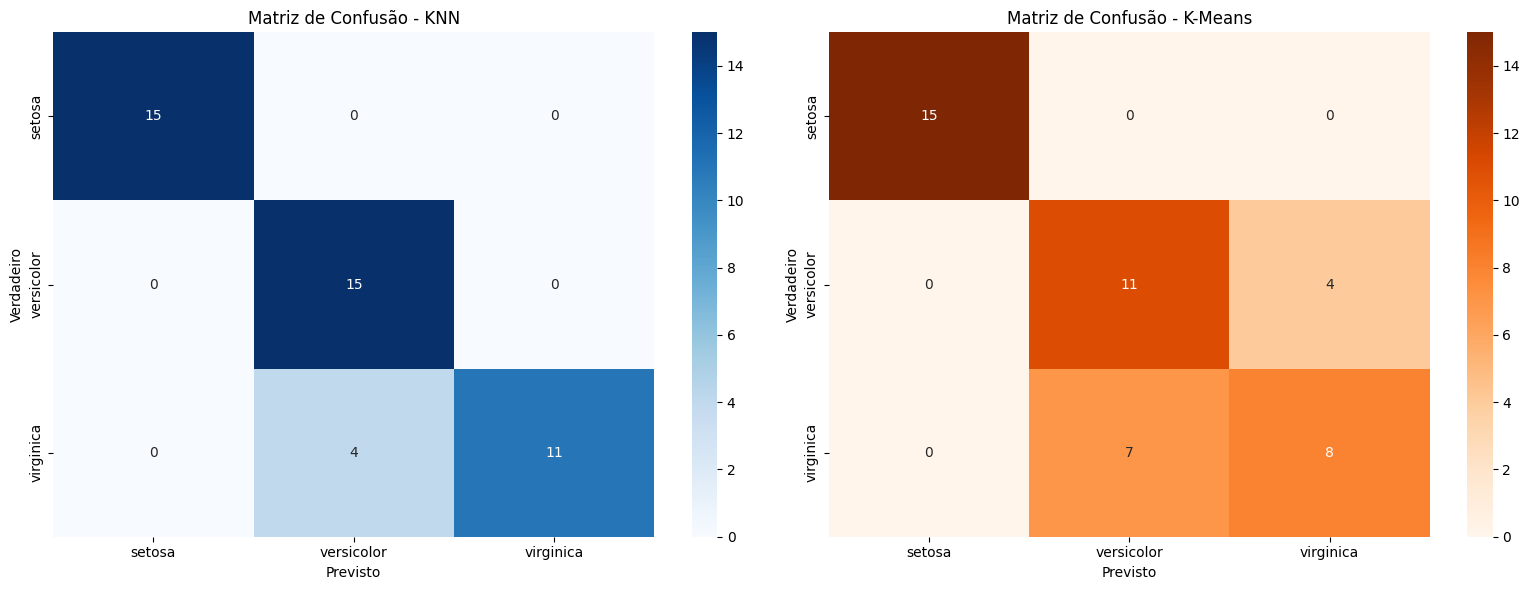

Matrizes de confusão geradas e salvas.


In [4]:
print("\n--- Etapa 3: Matrizes de Confusão ---")
# Predições do KNN
y_pred_knn = knn.predict(X_test)

# Mapeamento de clusters do K-Means para os rótulos reais
kmeans_clusters_test = kmeans.predict(X_test)
labels_map = np.zeros_like(kmeans_clusters_test)
for i in range(3):
    mask = (kmeans_clusters_test == i)
    # Associa o cluster ao rótulo mais comum dentro dele
    labels_map[mask] = mode(y_test[mask], keepdims=True)[0]
y_pred_kmeans = labels_map

# Gerando Matrizes
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_kmeans = confusion_matrix(y_test, y_pred_kmeans)

# Plotando
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[0])
axes[0].set_title('Matriz de Confusão - KNN')
axes[0].set_xlabel('Previsto'); axes[0].set_ylabel('Verdadeiro')
axes[0].figure.savefig(f'{output_dir}/2_matriz_confusao_knn.png', dpi=300, bbox_inches='tight')

sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Oranges', xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[1])
axes[1].set_title('Matriz de Confusão - K-Means')
axes[1].set_xlabel('Previsto'); axes[1].set_ylabel('Verdadeiro')
axes[1].figure.savefig(f'{output_dir}/3_matriz_confusao_kmeans.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
print("Matrizes de confusão geradas e salvas.")

In [5]:
print("\n--- Etapas 4 e 5: Avaliação e Comparação ---")

# Métricas para KNN
metrics_knn = {
    "Acurácia": accuracy_score(y_test, y_pred_knn),
    "Precisão (Média)": precision_score(y_test, y_pred_knn, average='macro'),
    "Recall (Média)": recall_score(y_test, y_pred_knn, average='macro'),
    "Pontuação F1 (Média)": f1_score(y_test, y_pred_knn, average='macro')
}

# Métricas para K-Means
metrics_kmeans = {
    "Acurácia": accuracy_score(y_test, y_pred_kmeans),
    "Precisão (Média)": precision_score(y_test, y_pred_kmeans, average='macro'),
    "Recall (Média)": recall_score(y_test, y_pred_kmeans, average='macro'),
    "Pontuação F1 (Média)": f1_score(y_test, y_pred_kmeans, average='macro')
}

# Tabulação dos resultados
results_df = pd.DataFrame({'KNN': metrics_knn, 'K-Means': metrics_kmeans}).T
print("Tabela Comparativa de Métricas:")
display(results_df)

print("\nRelatório de Classificação KNN:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

print("\nRelatório de Classificação K-Means (após mapeamento):")
print(classification_report(y_test, y_pred_kmeans, target_names=iris.target_names))


--- Etapas 4 e 5: Avaliação e Comparação ---
Tabela Comparativa de Métricas:


,Acurácia,Precisão (Média),Recall (Média),Pontuação F1 (Média)
KNN,0.911111,0.929825,0.911111,0.909502
K-Means,0.755556,0.759259,0.755556,0.753086



Relatório de Classificação KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Relatório de Classificação K-Means (após mapeamento):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.61      0.73      0.67        15
   virginica       0.67      0.53      0.59        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.76      0.76      0.75        45

